In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:

# Load the dataset
file_path = r"E:\Capstone_project_25\dataset_balanced_with_SMOTE.csv"  # Update path if needed
df = pd.read_csv(file_path)


In [3]:

# Check for the target column
target_column = "landslide_occurred"  # Ensure this column exists


In [4]:

# Separate features and target
X = df.drop(columns=[target_column])
y = df[target_column]


In [5]:

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [6]:

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)


In [7]:

# Train the model
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [8]:

# Predictions
y_pred = rf_model.predict(X_test)


In [9]:

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


In [10]:

# Print Results
print(f"Random Forest Model Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


Random Forest Model Accuracy: 0.5613

Confusion Matrix:
 [[154  99]
 [123 130]]

Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.61      0.58       253
           1       0.57      0.51      0.54       253

    accuracy                           0.56       506
   macro avg       0.56      0.56      0.56       506
weighted avg       0.56      0.56      0.56       506



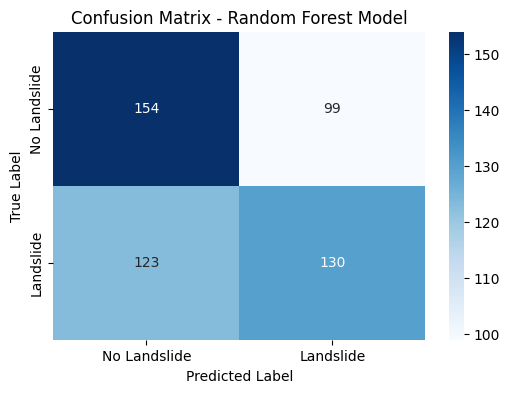

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=["No Landslide", "Landslide"], 
            yticklabels=["No Landslide", "Landslide"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest Model")
plt.show()


In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [13]:

# Load the dataset
df = pd.read_csv(r"E:\Capstone_project_25\dataset_balanced_with_SMOTE.csv")


In [14]:

# Separate features and target
X = df.drop(columns=["landslide_occurred"])  # Features
y = df["landslide_occurred"]  # Target variable


In [15]:

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [16]:

# Define the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)


Improving accuracy using hyperparameter tuning for Random Forest Model approach

In [17]:

# Define hyperparameter grid for tuning
param_grid = {
    "n_estimators": [100, 300, 500],  # Number of trees
    "max_depth": [10, 20, 30, None],  # Depth of trees
    "min_samples_split": [2, 5, 10],  # Min samples required to split a node
    "min_samples_leaf": [1, 2, 4]  # Min samples per leaf
}


In [18]:

# Perform Grid Search with 5-Fold Cross Validation
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring="accuracy", n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 300, 500]},
             scoring='accuracy', verbose=2)

In [19]:

# Get the best model
best_rf = grid_search.best_estimator_


In [20]:

# Make predictions
y_pred = best_rf.predict(X_test)


In [21]:

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


In [22]:

# Print results
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Optimized Random Forest Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Optimized Random Forest Accuracy: 0.6146

Confusion Matrix:
 [[163  90]
 [105 148]]

Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.64      0.63       253
           1       0.62      0.58      0.60       253

    accuracy                           0.61       506
   macro avg       0.62      0.61      0.61       506
weighted avg       0.62      0.61      0.61       506



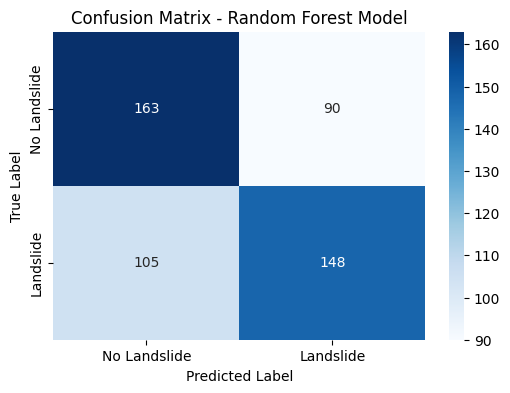

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=["No Landslide", "Landslide"], 
            yticklabels=["No Landslide", "Landslide"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest Model")
plt.show()
